In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

txt = './full-adversarial-output.txt'

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [18]:
with open(txt) as f:
    contents = f.read().split('\n')[1:-1]

In [19]:
g, real, fake = [], [], []

for c in contents:
    content = c.split(' ')
    g.append(float(content[4]))
    real.append(float(content[7]))
    fake.append(float(content[10]))

g = moving_average(g, n = 3)
real = moving_average(real, n = 3)
fake = moving_average(fake, n = 3)

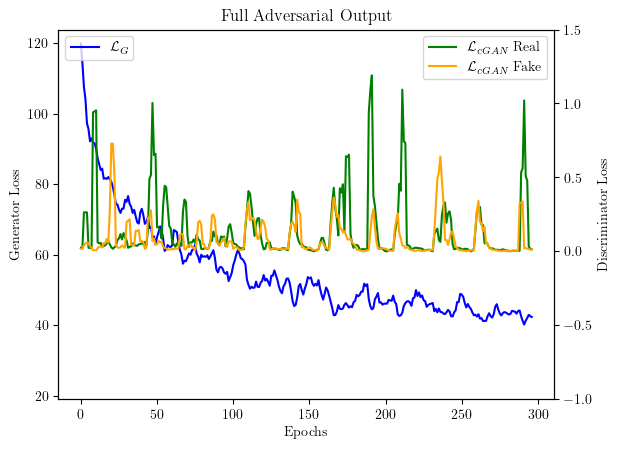

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(g, color='blue', label=r'$\mathcal{L}_G$')
ax1.set_ylabel('Generator Loss')
ax1.set_ylim(bottom = 19)
ax1.set_title('Full Adversarial Output')

ax2 = ax1.twinx()
ax1.set_xlabel('Epochs')
ax2.plot(real, color='green', label=r'$\mathcal{L}_{cGAN}$ Real')
ax2.set_ylabel('Discriminator Loss')
ax2.plot(fake, color='orange', label=r'$\mathcal{L}_{cGAN}$ Fake')
ax2.set_ylim(bottom = -1, top = 1.5)

# fig.tight_layout()
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')